## Variant 5 $$
\begin{cases} 8.1x_1 + 8.5x_2 = 72 \\ -3.2x_1 + 15.2x_2 = 42 \\ 10.2x_1 + 8.8x_2 = 205 \end{cases}$$

In [31]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np

In [32]:
lines = np.array([
    [8.1, 8.5, 72],
    [-3.2, 15.2, 42],
    [10.2, 8.8, 205],
])

In [33]:
def get_x2(a1, a2, b, x1):
    return (a1 * x1 - b) / a2

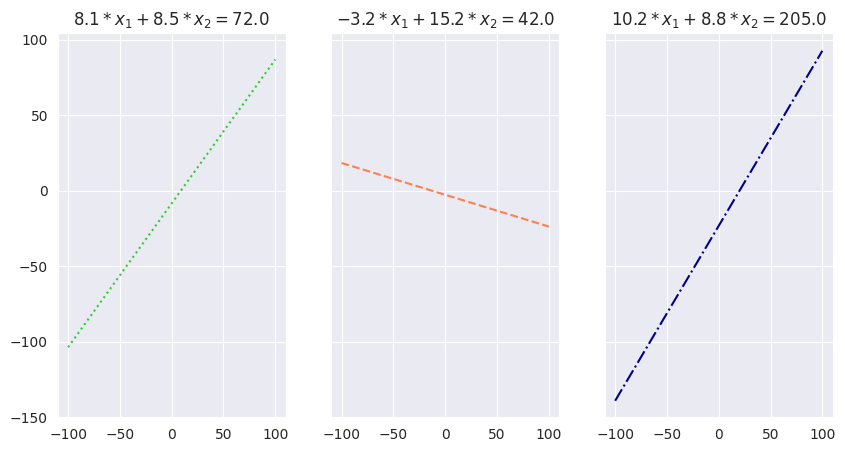

In [34]:
x = np.linspace(-100, 100)
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10, 5))
colors = ['limegreen', 'coral', 'darkblue']
linestyles = [':', '--', '-.']
for i in range(len(lines)):
    ax[i].plot(x, get_x2(*lines[i], x), color=colors[i], linestyle=linestyles[i])
    ax[i].set_title('${} * x_1 + {} * x_2 = {}$'.format(*lines[i]))
plt.show()

In [35]:
intersections = np.array([np.linalg.solve(lines[:, :-1][list(i)], lines[:, -1][list(i)]) for i in combinations(range(len(lines)), 2)])
intersections

array([[  4.90553486,   3.79590208],
       [ 71.91309987, -60.05836576],
       [ 14.99126638,   5.91921397]])

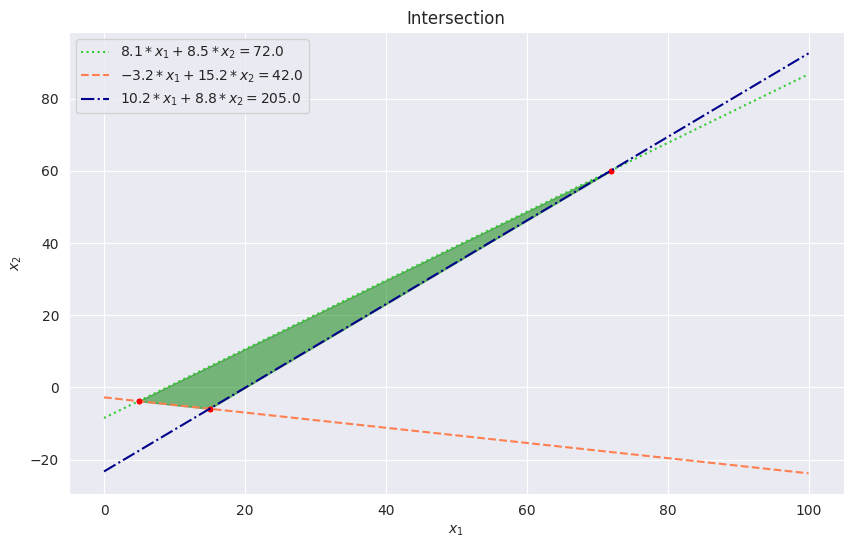

In [36]:
def plot_():
    figure = plt.figure(figsize=(10, 6))
    x = np.linspace(0, 100)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title('Intersection')
    colors = ['limegreen', 'coral', 'darkblue']
    linestyles = [':', '--', '-.']
    for i in range(len(lines)):
        plt.plot(intersections[:, 0], -intersections[:, 1], '.r')
        plt.plot(x, get_x2(*lines[i], x), color=colors[i], linestyle=linestyles[i],
                 label='${} * x_1 + {} * x_2 = {}$'.format(*lines[i]))

    X = np.linspace(intersections[:, 0].min(), intersections[:, 0].max())
    plt.fill_between(X, get_x2(*lines[0], X),
                     np.max([get_x2(*lines[1], X), get_x2(*lines[2], X)], axis=0),
                     color='green',
                     alpha=0.5)
    plt.legend()
    return figure


figure = plot_()

In [37]:
figure.savefig('result.svg')
figure.savefig('result.jpg')
figure.savefig('result.png')